## Задание 1

In [15]:
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline

In [16]:
a = np.random.normal(0, 2, 1000)
b = np.random.uniform(-0.5, 0.5, 1000)
c = a+b
print a[:10]
print b[:10]
print c[:10]
c.size

[ 2.04890398 -2.980765   -1.55692139  2.79175106  1.40866453 -0.91111048
  0.23434526 -0.27587301 -1.94049728 -0.49992854]
[ 0.41561457 -0.30529705  0.30708995 -0.29088066 -0.23470138 -0.31445898
 -0.04832595 -0.03795579  0.4735642   0.0624705 ]
[ 2.46451855 -3.28606205 -1.24983144  2.5008704   1.17396315 -1.22556946
  0.18601931 -0.3138288  -1.46693308 -0.43745804]


1000

### Для 1000 точек и гистограммы на 25 столбиков:

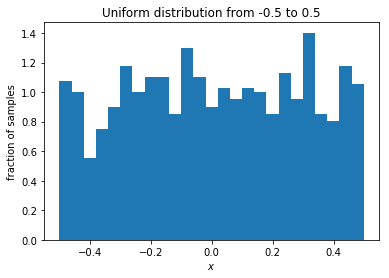

In [17]:
plt.hist(b, bins = 25, normed = True)
plt.title("Uniform distribution from -0.5 to 0.5")
plt.ylabel('fraction of samples')
plt.xlabel('$x$') ;

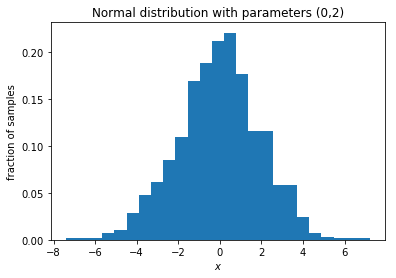

In [18]:
plt.hist(a, bins = 25, normed = True)
plt.title("Normal distribution with parameters (0,2)")
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

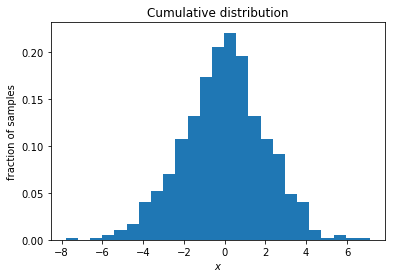

In [19]:
plt.hist(c, bins = 25, normed = True)
plt.title("Cumulative distribution")
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

## Для 10000 точек и гистограммы на 50 столбиков

In [20]:
a = np.random.normal(0, 2, 10000)
b = np.random.uniform(-0.5, 0.5, 10000)
c = a+b

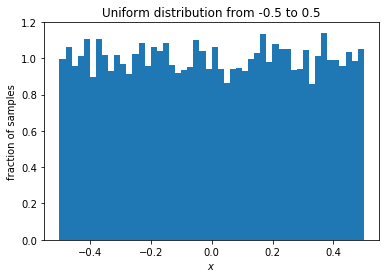

In [21]:
plt.hist(b, bins = 50, normed = True)
plt.title("Uniform distribution from -0.5 to 0.5")
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

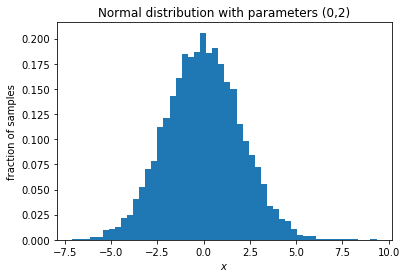

In [22]:
plt.hist(a, bins = 50, normed = True)
plt.title("Normal distribution with parameters (0,2)")
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

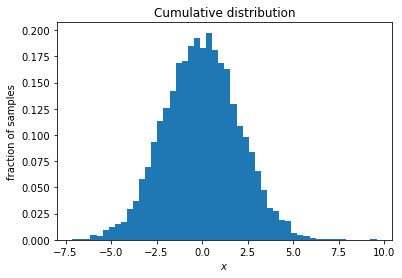

In [23]:
plt.hist(c, bins = 50, normed = True)
plt.title("Cumulative distribution")
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

### Как видим, распределение остаётся близким к нормальному

## Задание 2

### Объявление класса

In [24]:
class Simple:
    def __init__(self):
        self.list = []
    def f1(self):
        self.list.append(123)
    def f2(self):
        self.f1()

s = Simple()
s.f2()
print s.list

[123]


### Простой декоратор метода

In [25]:
def a_new_decorator(a_func):

    def wrapTheFunction():
        print("Я делаю что-то скучное перед исполнением a_func()")

        a_func()

        print("Я делаю что-то скучное после исполнения a_func()")

    return wrapTheFunction

In [26]:
def a_function_requiring_decoration():
    print("Я функция, которая требует декорации")

In [27]:
a_function_requiring_decoration()

Я функция, которая требует декорации


In [28]:
a_function_requiring_decoration = a_new_decorator(a_function_requiring_decoration)
# Теперь функция a_function_requiring_decoration обернута в wrapTheFunction()

In [29]:
a_function_requiring_decoration()

Я делаю что-то скучное перед исполнением a_func()
Я функция, которая требует декорации
Я делаю что-то скучное после исполнения a_func()


### Сокращённое использование декоратора

In [30]:
@a_new_decorator
def a_function_requiring_decoration():
    print("Я новая функция, которая требует декорации")

In [31]:
a_function_requiring_decoration()

Я делаю что-то скучное перед исполнением a_func()
Я новая функция, которая требует декорации
Я делаю что-то скучное после исполнения a_func()


### Проблема при использовании: при попытке вывести имя функции, выводится имя внутренней функции декоратора

In [32]:
print(a_function_requiring_decoration.__name__)

wrapTheFunction


### Решение: использование wraps

In [33]:
from functools import wraps

def a_new_decorator(a_func):
    @wraps(a_func)
    def wrapTheFunction():
        print("Я делаю что-то скучное перед исполнением a_func()")
        a_func()
        print("Я делаю что-то скучное после исполнения a_func()")
    return wrapTheFunction

@a_new_decorator
def a_function_requiring_decoration():
    print("Я функция, которая требует декорации")

print(a_function_requiring_decoration.__name__)

a_function_requiring_decoration


### Декорирование метода в классе

In [34]:
def new_decorator(method_to_decorate):
    def wrapper(self):
        print("stmt before method_to_decorate")
        method_to_decorate(self)
        print("stmt after method_to_decorate")
    return wrapper

class Simple2:
    @new_decorator
    def f1(self):
        print("old func")

In [35]:
o = Simple2()
o.f1()

stmt before method_to_decorate
old func
stmt after method_to_decorate


### Использование *args 

In [36]:
def test_args_kwargs(arg1, arg2, arg3):
    print("arg1:", arg1)
    print("arg2:", arg2)
    print("arg3:", arg3)

In [38]:
args = ("two", 3, 5)
test_args_kwargs(*args)

('arg1:', 'two')
('arg2:', 3)
('arg3:', 5)


In [39]:
def test_var_args(f_arg, *args):
    print "Первый позиционный аргумент:", f_arg
    for arg in args:
        print "Другой аргумент из *args:", arg

test_var_args('one', 'two', 'three', 'four')

Первый позиционный аргумент: one
Другой аргумент из *args: two
Другой аргумент из *args: three
Другой аргумент из *args: four


### Использование **kwargs 

In [40]:
kwargs = {"arg3": 3, "arg2": "two", "arg1": 5}
test_args_kwargs(**kwargs)

('arg1:', 5)
('arg2:', 'two')
('arg3:', 3)


In [41]:
def greet_me(**kwargs):
    for key, value in kwargs.items():
        print("{0} = {1}".format(key, value))

greet_me(name="Vasia")

name = Vasia


### Декоратор, кэширующий значения функции

In [42]:
from functools import wraps

def memoize(function):
    memo = {}
    @wraps(function)
    def wrapper(*args, **kwargs):
        if args in memo:
            return memo[args]
        else:
            rv = function(*args, **kwargs)
            memo[args] = rv
            return rv
    return wrapper

@memoize
def fibonacci(n):
    if n < 2: return n
    return fibonacci(n - 1) + fibonacci(n - 2)

fibonacci(25)

75025

### Декоратор, измеряющий время выполнения функции

In [43]:
import time

def timer(f):
    @wraps(f)
    def tmp(*args, **kwargs):
        t = time.time()
        res = f(*args, **kwargs)
        print "Время выполнения функции: %f" % (time.time()-t)
        return res
    return tmp

@timer
def func(x, y):
    return x + y

func(2,3)

Время выполнения функции: 0.000000


5

### Декоратор со всеми примочками, использование для различных функций

In [44]:
def total_wrapper(f):
    @wraps(f)
    def tmp(*args, **kwargs):
        t = time.time()
        res = f(*args, **kwargs)
        print "Время выполнения функции: %f" % (time.time()-t)
        print "Название функции: %s" % (f.__name__)
        for arg in args:
            print "Значение аргумента функции", arg
        for key, value in kwargs.items():
            print "{0} - это название именованного аргумента {1}".format(key, value)
        return res
    return tmp

@total_wrapper
def func(x, y):
    return x + y

func(x = 2,y = 3)

Время выполнения функции: 0.000000
Название функции: func
y - это название именованного аргумента 3
x - это название именованного аргумента 2


5

In [45]:
import numpy as np
@total_wrapper
def func(x, y, z):
    return np.linspace(x, y, z)

func(1, 20, 5)

Время выполнения функции: 0.000000
Название функции: func
Значение аргумента функции 1
Значение аргумента функции 20
Значение аргумента функции 5


array([  1.  ,   5.75,  10.5 ,  15.25,  20.  ])

In [53]:
@total_wrapper
def func(x, y):
    a = np.cos(x) + np.sin(y)
    return a

func(2, y = 3)

Время выполнения функции: 0.000000
Название функции: func
Значение аргумента функции 2
y - это название именованного аргумента 3


-0.27502682848727522